# Data Analysis Portfolio Project using SQL and Tableau: NYC Tree Census and Income project

![trees](https://i.pinimg.com/564x/40/bb/25/40bb257f29dde3cc0825d2d6f5fb757a.jpg)

## Introduction 

In this data analysis portfolio project I delve into the fascinating intersection of urban forestry and socioeconomic factors in New York City. I explore data extracted from the [NYC Tree Census](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35) conducted in 2015, along with [income statistics](https://data.census.gov/table/ACSST5Y2015.S1901?t=Income%20and%20Poverty&g=050XX00US36081$8600000,36085$8600000,36005$8600000,36061$8600000,36047$8600000&tid=ACSST5Y2015.S1901) across different zip codes in the city.


I'm following the usual steps in data analysis: **ask, prepare, process, analyze, share, and act**.

## Step 1. Asking Questions

Research question: ***I there relationship between tees and income in NYC?***

In this project, I aim to resolve the following questions:
- *How many trees are in metro NYC?*
- *How many trees are in each borough?*
- *What is the income of each borough?*
- *What is the income across different zip codes?*
- *What is the tree concentration across different zip codes?*
- *Does tree health vary across rich vs pood zip codes?*
- *Do certain boroughs have more living trees?*
- *Do certain borough have newer/younger trees?*

##  Step 2. Data Cleaning and Exploration in SQL

### Trees Table
The 'trees' table offers a comprehensive look at street trees in Metro NY, providing insights into various aspects of tree health, distribution, and location:

1. **tree_id**: Unique identifier for each tree.
2. **tree_dbh**: Diameter at breast height of the tree.
3. **stump_diam**: Diameter of the stump.
4. **status**: Indicates whether the tree is alive, standing dead, or a stump.
5. **health**: Indicates the user's perception of tree health (Good, Fair, Poor).
6. **borocode**: Borough code (1 for Manhattan, 2 for Bronx, 3 for Brooklyn, 4 for Queens, 5 for Staten Island).
7. **boroname**: Name of the borough in which the tree point is located.
8. **nta_name**: Neighborhood Tabulation Area name.
9. **state**: State of the tree location.
10. **latitude**: Latitude coordinate of the tree location.
11. **longitude**: Longitude coordinate of the tree location.

### Income Trees Table
The 'income_trees' table includes statistical information about income for each zipcode where trees are located, including:

1. **zipcode**: Zipcode of the tree location.
2. **Estimate_Total**: Total income estimate.
3. **Margin_of_Error_Total**: Margin of error for the total income estimate.
4. **Estimate_Median_income**: Median income estimate.
5. **Margin_of_Error_Median_income**: Margin of error for the median income estimate.
6. **Estimate_Mean_income**: Mean income estimate.
7. **Margin_of_Error_Mean_income**: Margin of error for the mean income estimate.

I imported the datasets into a PostgreSQL database and performed initial data exploration. This included examining the first 10 rows of each table, understanding the column names and data types to gain insights into the data structure and content.

In [ ]:
-- Creates the 'trees' table
CREATE TABLE trees (
    index INTEGER PRIMARY KEY,
	tree_id INTEGER, 
    tree_dbh INTEGER,
    stump_diam INTEGER,
    status VARCHAR,
    health VARCHAR,
    spc_latin VARCHAR,
    spc_common VARCHAR,
    address VARCHAR,
    zipcode INTEGER,
    borocode INTEGER,
    boroname VARCHAR,
    nta_name VARCHAR,
    state VARCHAR,
    latitude FLOAT,
    longitude FLOAT
);

The table contains 683788 rows.

Then I checked the table for duplicayed rows.

In [ ]:
-- Counts the number of duplicate tree IDs
SELECT tree_id, COUNT(*)
FROM trees
GROUP BY tree_id
HAVING COUNT(*) > 1;

No duplicates in the data.

In [ ]:
-- Retrieves the first 10 rows from the 'trees' table
SELECT *
FROM trees
LIMIT 10;

| index | tree_id | tree_dbh | stump_diam | status | health | spc_latin                              | spc_common      | address              | zipcode | borocode | boroname       | nta_name                        | state    | latitude    | longitude    |
|-------|---------|----------|------------|--------|--------|----------------------------------------|-----------------|----------------------|---------|----------|----------------|---------------------------------|----------|-------------|--------------|
| 0     | 180683  | 3        | 0          | Alive  | Fair   | Acer rubrum                            | red maple       | 108-005 70 AVENUE   | 11375   | 4        | Queens         | Forest Hills                    | New York | 40.72309177 | -73.84421522 |
| 1     | 200540  | 21       | 0          | Alive  | Fair   | Quercus palustris                      | pin oak         | 147-074 7 AVENUE    | 11357   | 4        | Queens         | Whitestone                      | New York | 40.79411067 | -73.81867946 |
| 2     | 204026  | 3        | 0          | Alive  | Good   | Gleditsia triacanthos var. inermis    | honeylocust     | 390 MORGAN AVENUE    | 11211   | 3        | Brooklyn       | East Williamsburg               | New York | 40.71758074 | -73.9366077  |
| 3     | 204337  | 10       | 0          | Alive  | Good   | Gleditsia triacanthos var. inermis    | honeylocust     | 1027 GRAND STREET    | 11211   | 3        | Brooklyn       | East Williamsburg               | New York | 40.71353749 | -73.93445616 |
| 4     | 189565  | 21       | 0          | Alive  | Good   | Tilia americana                       | American linden | 603 6 STREET         | 11215   | 3        | Brooklyn       | Park Slope-Gowanus              | New York | 40.66677776 | -73.97597938 |
| 5     | 190422  | 11       | 0          | Alive  | Good   | Gleditsia triacanthos var. inermis    | honeylocust     | 8 COLUMBUS AVENUE    | 10023   | 1        | Manhattan      | Lincoln Square                  | New York | 40.77004563 | -73.98494997 |
| 6     | 190426  | 11       | 0          | Alive  | Good   | Gleditsia triacanthos var. inermis    | honeylocust     | 120 WEST 60 STREET   | 10023   | 1        | Manhattan      | Lincoln Square                  | New York | 40.77020969 | -73.98533807 |
| 7     | 208649  | 9        | 0          | Alive  | Good   | Tilia americana                       | American linden | 311 WEST 50 STREET   | 10019   | 1        | Manhattan      | Clinton                         | New York | 40.76272385 | -73.98729652 |
| 8     | 209610  | 6        | 0          | Alive  | Good   | Gleditsia triacanthos var. inermis    | honeylocust     | 65 JEROME AVENUE     | 10305   | 5        | Staten Island  | Grasmere-Arrochar-Ft. Wadsworth | New York | 40.59657931 | -74.07625483 |
| 9     | 192755  | 21       | 0          | Alive  | Fair   | Platanus x acerifolia                 | London planetree| 638 AVENUE Z         | 11223   | 3        | Brooklyn       | Gravesend                       | New York | 40.58635725 | -73.96974394 |


In [ ]:
-- Creates the 'income_trees' table
CREATE TABLE income_trees (
    zipcode INTEGER,
    Estimate_Total INTEGER,
    Margin_of_Error_Total INTEGER,
    Estimate_Median_income INTEGER,
    Margin_of_Error_Median_income INTEGER,
    Estimate_Mean_income INTEGER,
    Margin_of_Error_Mean_income INTEGER
);

218 row in the table.

In [ ]:
-- Counts the number of duplicate zipcodes
SELECT zipcode, COUNT(*)
FROM income_trees
GROUP BY zipcode
HAVING COUNT(*) > 1;

No duplicated zipcodes in the table.

In [ ]:
-- Retrieves the first 10 rows from the 'income_trees' table
SELECT *
FROM income_trees
LIMIT 10;

| zipcode | estimate_total | margin_of_error_total | estimate_median_income | margin_of_error_median_income | estimate_mean_income | margin_of_error_mean_income |
|---------|----------------|-----------------------|------------------------|-------------------------------|----------------------|-----------------------------|
| 10451   | 18140          | 405                   | 26048                  | 2140                          | 40836                | 3424                        |
| 10452   | 25432          | 368                   | 24790                  | 1337                          | 36083                | 1578                        |
| 10453   | 26802          | 409                   | 23095                  | 1605                          | 33354                | 1416                        |
| 10454   | 12790          | 247                   | 20210                  | 1930                          | 31533                | 2272                        |
| 10455   | 14023          | 329                   | 23253                  | 1598                          | 32854                | 2127                        |
| 10456   | 29255          | 436                   | 23956                  | 1688                          | 35722                | 2118                        |
| 10457   | 23749          | 422                   | 24750                  | 1471                          | 36604                | 2624                        |
| 10458   | 26349          | 517                   | 27912                  | 2345                          | 41474                | 2736                        |
| 10459   | 15688          | 318                   | 23761                  | 1626                          | 35964                | 2440                        |
| 10460   | 19776          | 356                   | 23209                  | 1491                          | 35624                | 1779                        |


## Step 3. Data Analysis using SQL and Data Visualization in Tableau

### How many trees are in metro NYC?

In [ ]:
-- Counts the total number of trees
SELECT COUNT(tree_id)
FROM trees;

683788 trees.

### How many trees are in each borough?

In [ ]:
-- Counts the number of trees in each borough and calculates their percentage of the total
SELECT boroname AS borough_name, COUNT(*) AS tree_count, 
ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM trees),2) AS percentage_of_total
FROM trees
WHERE boroname IS NOT NULL
GROUP BY boroname
ORDER BY 2 DESC;

| borough_name   | tree_count | percentage_of_total |
|----------------|------------|---------------------|
| Queens         | 250551     | 36.64               |
| Brooklyn       | 177293     | 25.93               |
| Staten Island  | 105318     | 15.40               |
| Bronx          | 85203      | 12.46               |
| Manhattan      | 65423      | 9.57                |


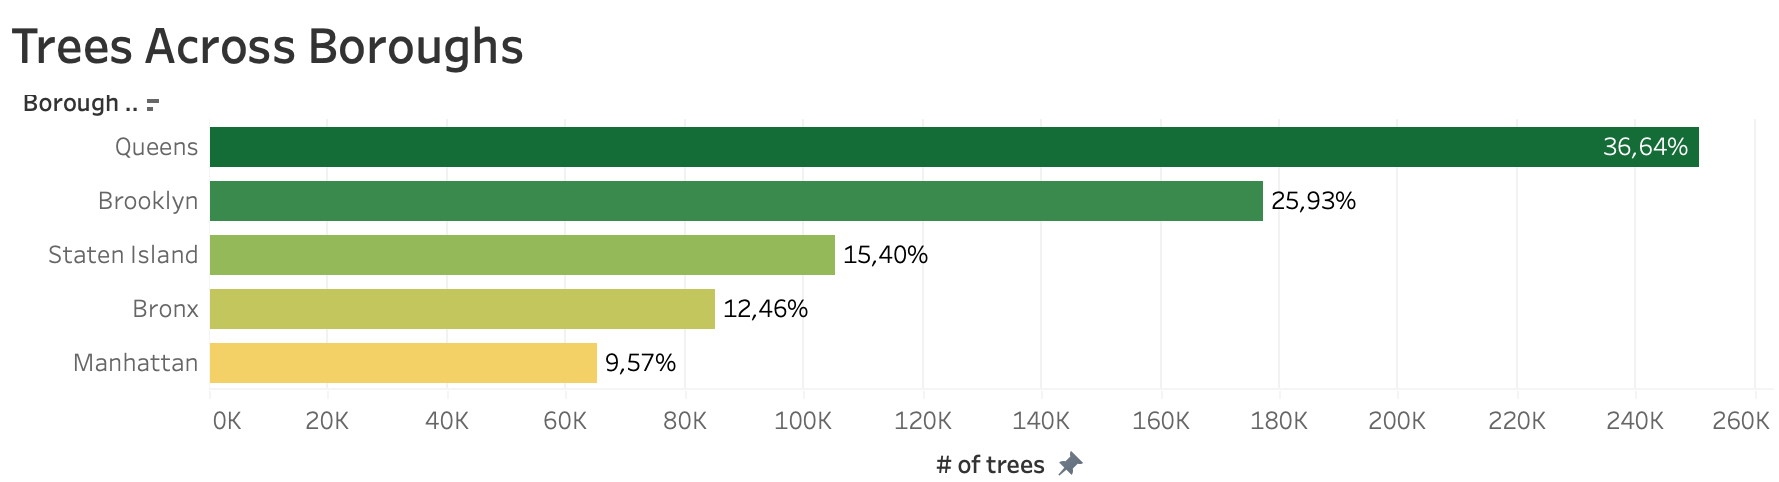)

#### Analysis
The table presents the distribution of trees across the boroughs of New York City. It shows the total count of trees in each borough along with the percentage of the total number of trees in the dataset that each borough represents.
- The borough **Queens** represents the **highest number of trees, accounting for approximately 36.64%** of the total trees in the dataset. This suggests that Queens has a significant amount of greenery and tree cover compared to other boroughs.
- Meanwhile, **Manhattan** has the **fewest** number of trees among the boroughs, comprising only **9.57%** of the total. This is understandable given Manhattan's dense urban landscape and limited space for large-scale greenery.

### What is the income of each borough?

To get this information I create a temporary table 'joined_trees' by joining 'trees' and 'income_trees' tables.

In [ ]:
-- Creates a temporary table 
CREATE TEMP TABLE joined_trees AS
SELECT
    t.index,
    t.tree_id,
    t.tree_dbh,
    t.stump_diam,
    t.status,
    t.health,
    t.spc_latin,
    t.spc_common,
    t.address,
    COALESCE(t.zipcode, it.zipcode) AS zipcode,
    t.borocode,
    t.boroname,
    t.nta_name,
    t.state,
    t.latitude,
    t.longitude,
    COALESCE(it.Estimate_Total, 0) AS estimate_total,
    COALESCE(it.Margin_of_Error_Total, 0) AS margin_of_error_total,
    COALESCE(it.Estimate_Median_income, 0) AS estimate_median_income,
    COALESCE(it.Margin_of_Error_Median_income, 0) AS margin_of_error_median_income,
    COALESCE(it.Estimate_Mean_income, 0) AS estimate_mean_income,
    COALESCE(it.Margin_of_Error_Mean_income, 0) AS margin_of_error_mean_income
FROM 
    trees t
FULL OUTER JOIN 
    income_trees it ON t.zipcode = it.zipcode;

-- Calculates median and average income for each borough
SELECT
    boroname as borough,
	ROUND(AVG(estimate_mean_income), 0) AS mean_income,
	ROUND(AVG(estimate_median_income), 0) AS median_income,
	COUNT(tree_id) AS count_trees
FROM
    joined_trees
WHERE estimate_median_income > 0 and estimate_mean_income > 0 AND boroname IS NOT NULL
GROUP BY
    boroname
ORDER BY 4 DESC;

| borough      | mean_income | median_income | count_trees |
|---------------|-------------|---------------|-------------|
| Queens        | 81232       | 64354         | 253543      |
| Brooklyn      | 72989       | 51914         | 175358      |
| Staten Island | 87953       | 70786         | 105318      |
| Bronx         | 54103       | 40206         | 88926       |
| Manhattan     | 148516      | 92582         | 64278       |


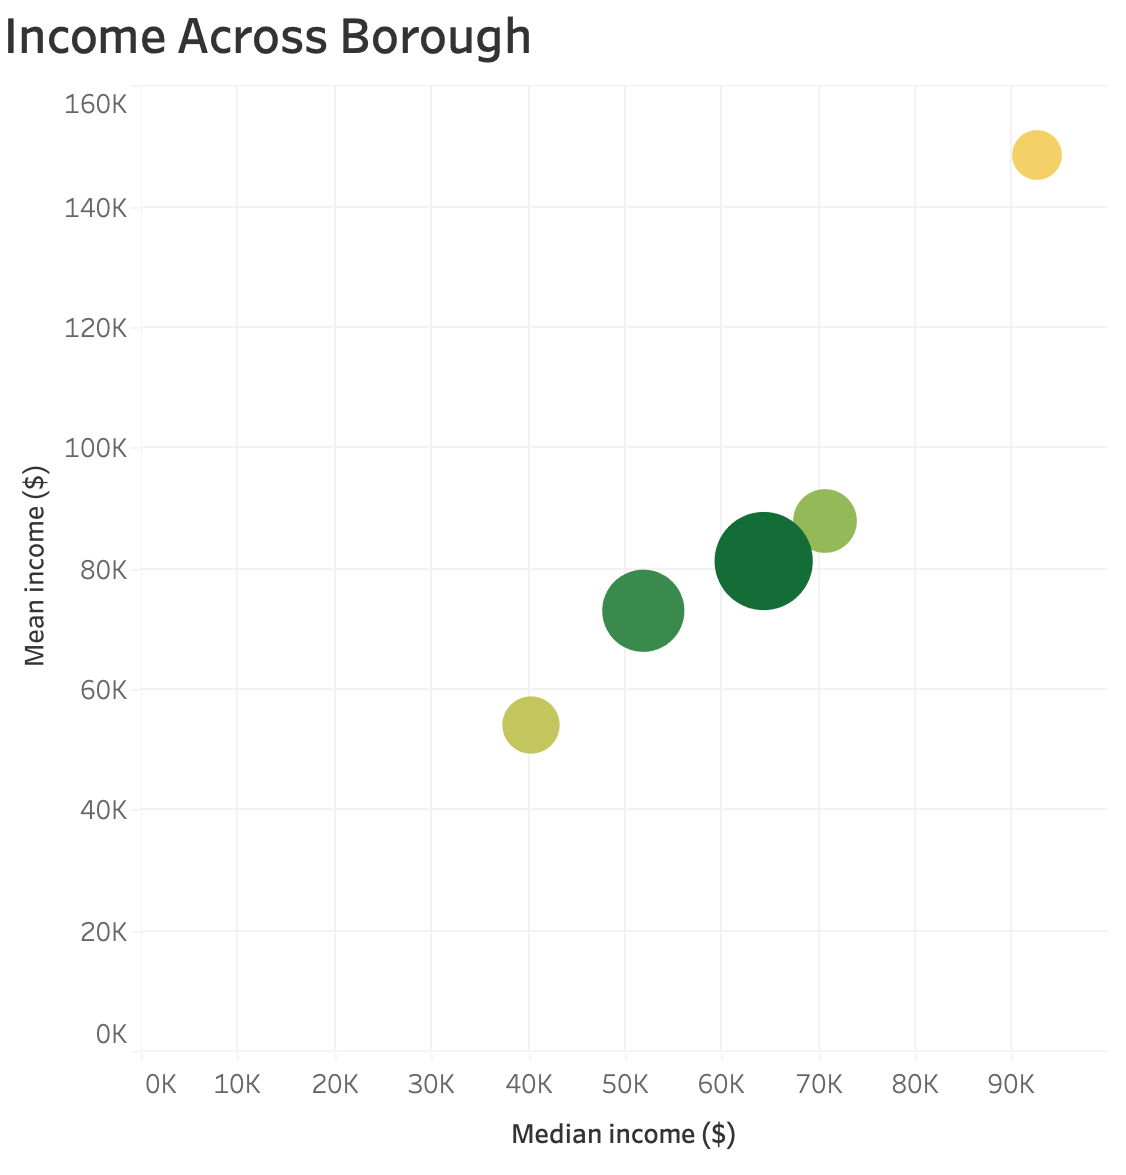

#### Analysis

This table offers a comparison of income levels (mean and median) alongside the count of trees across different boroughs in New York City.
- Despite having the highest income levels, **Manhattan has the lowest tree count among the boroughs**. This suggests a potential trade-off between urban development and green space preservation in densely populated areas.
- **Queens** has the **largest count of trees** compared to the other boroughs, while its **mean and median income levels are not significantly different from those of other boroughs**. 
- The boroughs that have a substantial greenery presence (such as Queens and Brooklyn) do not exhibit notably higher or lower income. 

### What is the income across different zip codes?

In [ ]:
-- Retrieves the top 5 zipcodes with the highest median income
SELECT
	DISTINCT zipcode,
	estimate_median_income,
	boroname as borough
FROM
    joined_trees
WHERE boroname IS NOT NULL
ORDER BY estimate_median_income DESC
LIMIT 5;

| zipcode | estimate_median_income | borough   |
|---------|------------------------|-----------|
| 10282   | 250000                 | Manhattan |
| 10007   | 250000                 | Manhattan |
| 10069   | 163750                 | Manhattan |
| 10280   | 145432                 | Manhattan |
| 11109   | 129505                 | Queens    |


In [ ]:
-- Retrieves the top 5 zipcodes with the lowest median income (excluding zero values)
SELECT
	DISTINCT zipcode,
	estimate_median_income,
	boroname as borough
FROM
    joined_trees
WHERE boroname IS NOT NULL AND estimate_median_income != 0
ORDER BY estimate_median_income
LIMIT 5;

| zipcode | estimate_median_income | borough |
|---------|------------------------|---------|
| 10454   | 20210                  | Bronx   |
| 10453   | 23095                  | Bronx   |
| 10460   | 23209                  | Bronx   |
| 10455   | 23253                  | Bronx   |
| 10459   | 23761                  | Bronx   |


In [ ]:
WITH Borough_Ranks AS (
    SELECT
        boroname as borough,
        zipcode,
        estimate_median_income,
        ROW_NUMBER() OVER (PARTITION BY boroname ORDER BY estimate_median_income) AS poorest_rank,
        ROW_NUMBER() OVER (PARTITION BY boroname ORDER BY estimate_median_income DESC) AS richest_rank
    FROM
        joined_trees
	WHERE boroname IS NOT NULL and zipcode != 83
)
SELECT
    boroname,
    MIN(CASE WHEN poorest_rank = 1 THEN zipcode END) AS poorest_zipcode,
    MAX(CASE WHEN richest_rank = 1 THEN zipcode END) AS richest_zipcode
FROM
    Borough_Ranks
GROUP BY
    boroname;

| boroname      | poorest_zipcode | richest_zipcode |
|---------------|-----------------|-----------------|
| Bronx         | 10454           | 10471           |
| Brooklyn      | 11239           | 11215           |
| Manhattan     | 10035           | 10007           |
| Queens        | 11355           | 11109           |
| Staten Island | 10303           | 10309           |


The tables indicate 5 first richest zipcodes and 5 poorest in Metro NY. And the last one showcase the poorest and richest zipcode and each borough.

### What is the tree concentration across different zip codes?

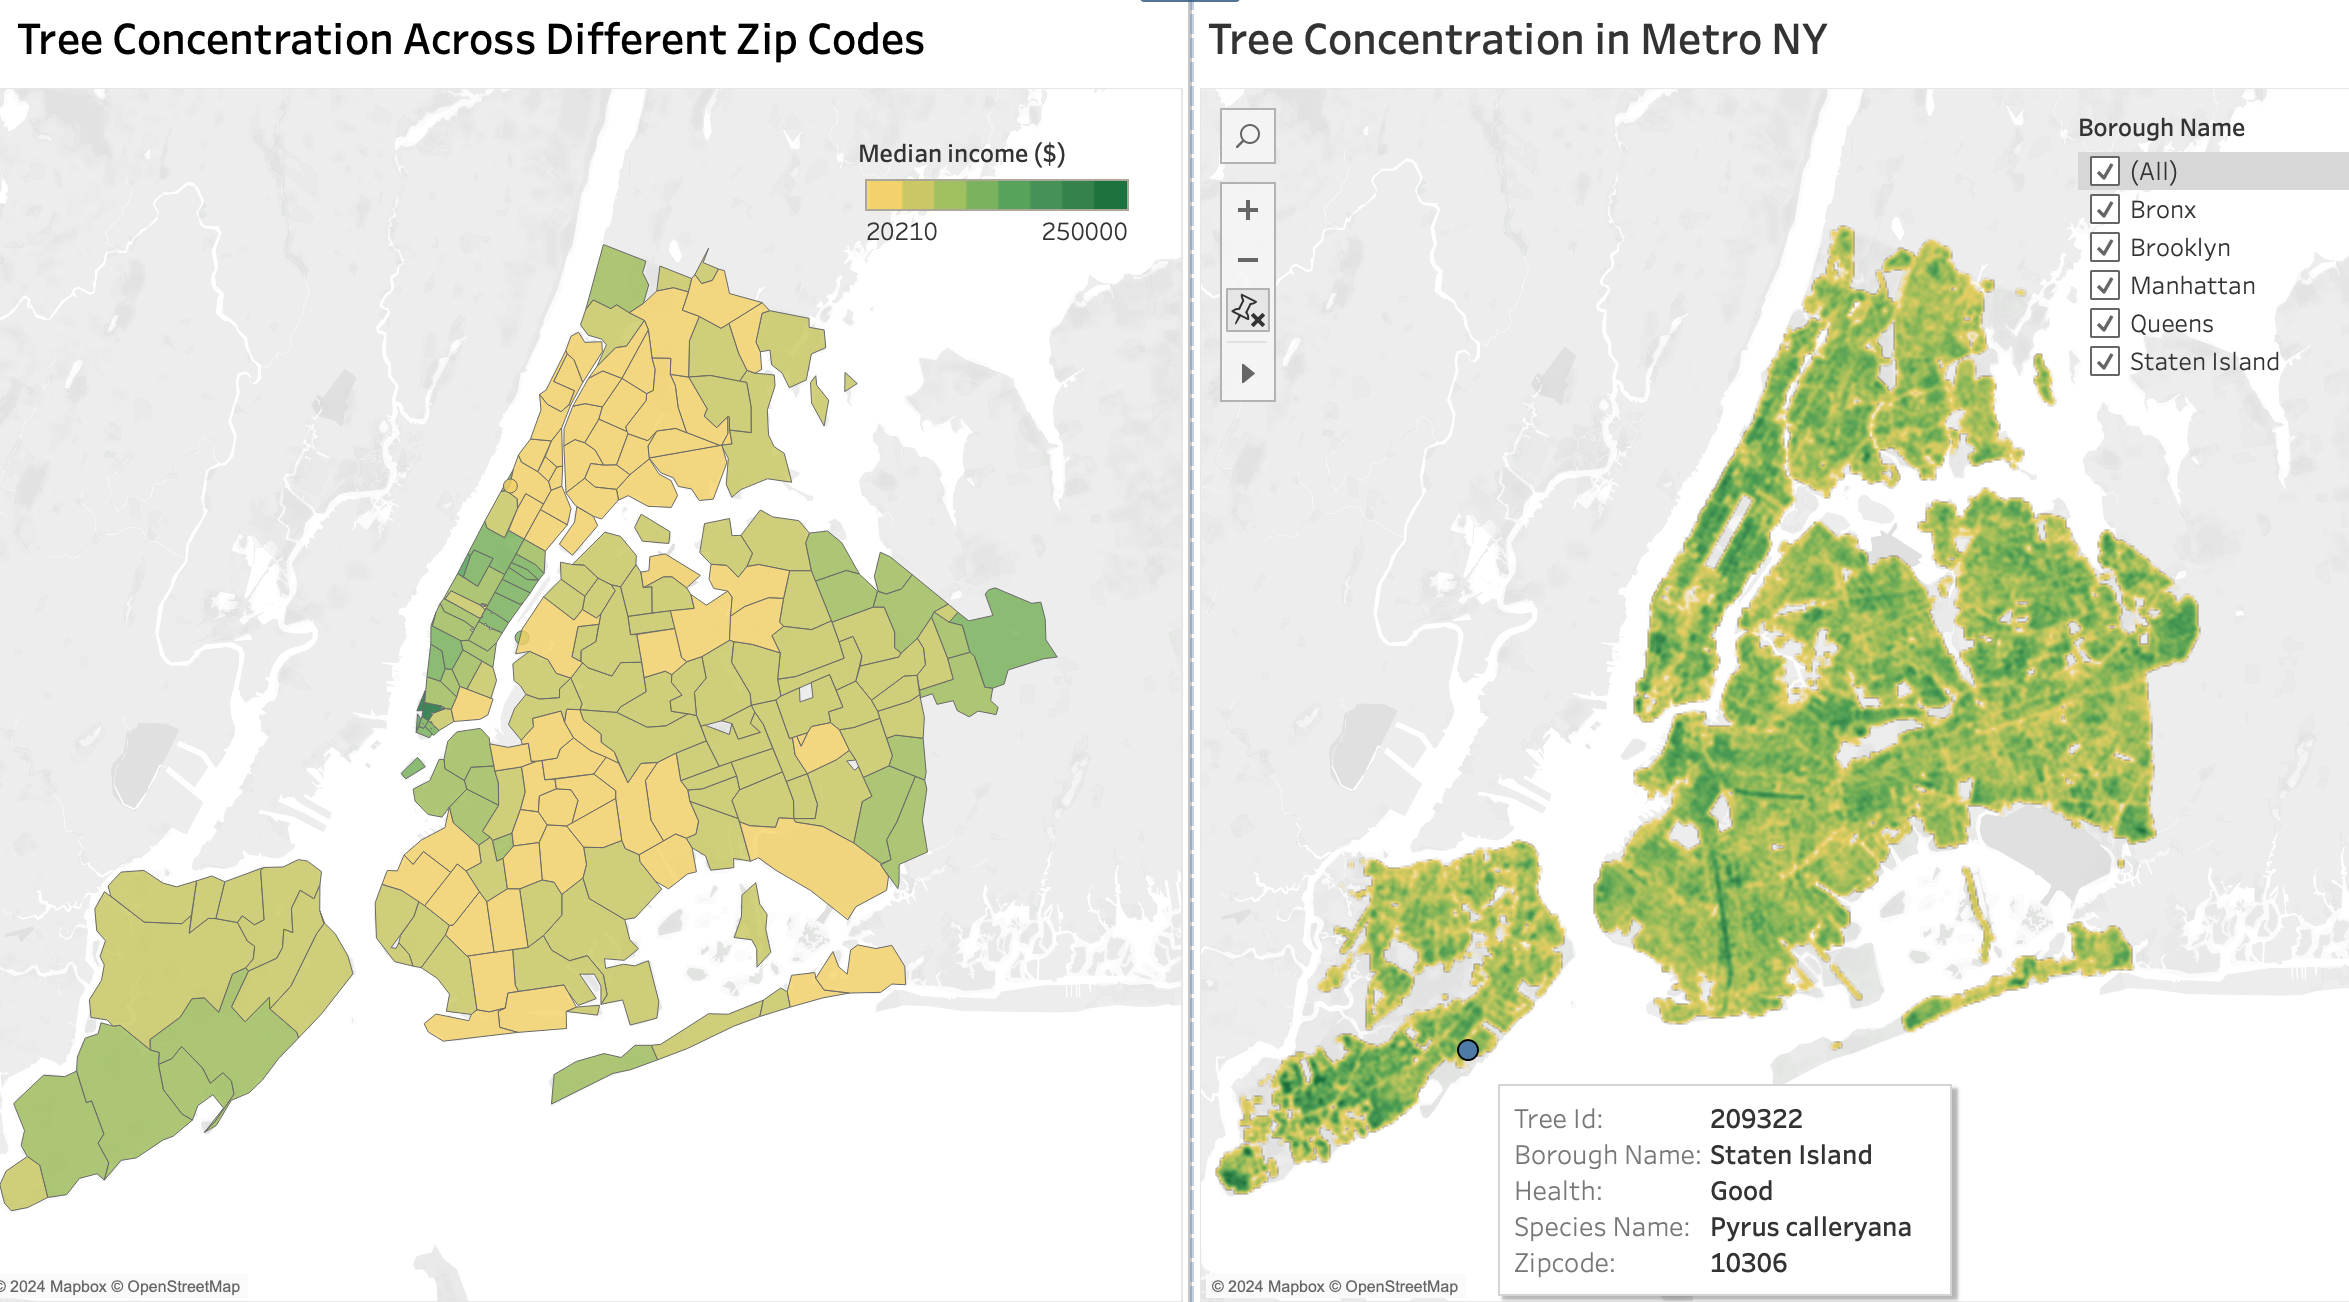

### Does tree health vary across rich vs pood zip codes?

In [ ]:
-- Calculates various statistics for each borough tree count, and percentage of trees in different health states
WITH Boroughs AS (
    SELECT DISTINCT boroname
    FROM joined_trees
),
Borough_Health_Tree_Counts AS (
    SELECT
        j.boroname,
        j.health,
        COUNT(*) AS tree_count
    FROM joined_trees j
    WHERE j.health IS NOT NULL AND j.health != '' /
    GROUP BY j.boroname, j.health
),
Borough_Health_Total_Trees AS (
    SELECT
        bh.boroname,
        SUM(bh.tree_count) AS total_trees
    FROM Borough_Health_Tree_Counts bh
    GROUP BY bh.boroname
)
SELECT
    b.boroname AS Borough,
    bh.health AS Health_State,
    SUM(bh.tree_count) AS Total_Trees,
    ROUND(SUM(bh.tree_count * 100.0) / bt.total_trees, 2) AS Percentage
FROM
    Boroughs b
CROSS JOIN
    (SELECT DISTINCT health FROM Borough_Health_Tree_Counts WHERE health IS NOT NULL) AS h
LEFT JOIN
    Borough_Health_Tree_Counts bh ON b.boroname = bh.boroname AND h.health = bh.health
JOIN
    Borough_Health_Total_Trees bt ON b.boroname = bt.boroname
GROUP BY
    b.boroname, bh.health, bt.total_trees
ORDER BY
    b.boroname, bh.health;

| borough        | health_state | total_trees | percentage |
|----------------|--------------|-------------|------------|
| Bronx          | Fair         | 11382       | 13.53      |
| Bronx          | Good         | 69499       | 82.60      |
| Bronx          | Poor         | 3257        | 3.87       |
| Brooklyn       | Fair         | 25073       | 14.77      |
| Brooklyn       | Good         | 138212      | 81.42      |
| Brooklyn       | Poor         | 6459        | 3.81       |
| Manhattan      | Fair         | 11460       | 18.36      |
| Manhattan      | Good         | 47358       | 75.86      |
| Manhattan      | Poor         | 3609        | 5.78       |
| Queens         | Fair         | 34982       | 14.52      |
| Queens         | Good         | 196441      | 81.51      |
| Queens         | Poor         | 9574        | 3.97       |
| Staten Island  | Fair         | 14535       | 14.33      |
| Staten Island  | Good         | 82669       | 81.49      |
| Staten Island  | Poor         | 4238        | 4.18       |


The table provides information about the distribution of tree health states (Fair, Good, and Poor) within different boroughs of New York City, along with the corresponding total tree count and percentage of trees in each health state. 

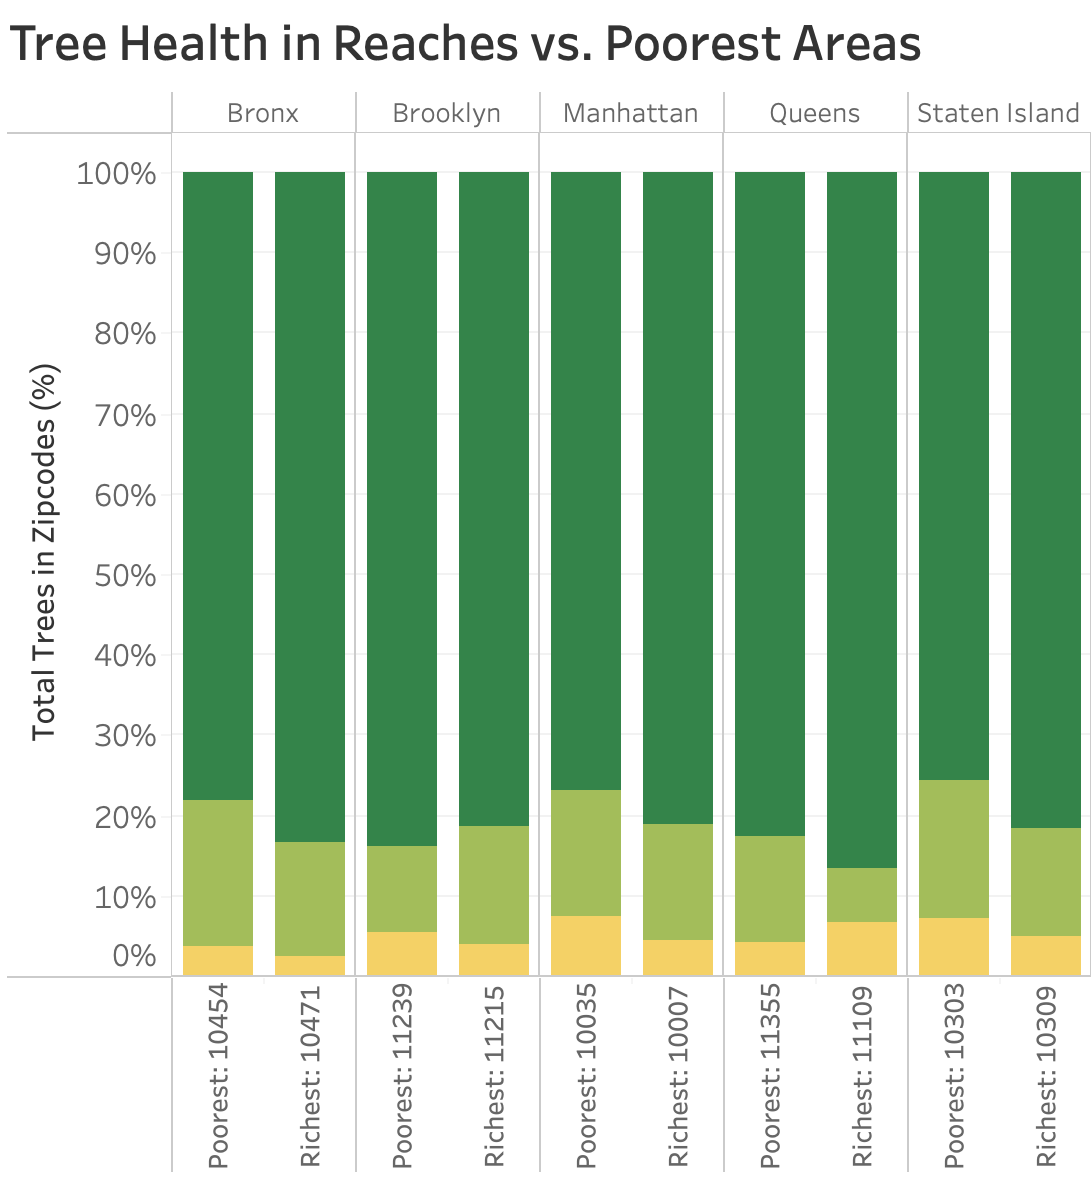

#### Analysis:

- **Queens has the highest proportion of "Good" health state trees**, followed closely by Brooklyn and Manhattan.
- **Staten Island has the highest proportion of "Fair"** health state trees compared to other boroughs.
- The distribution of "Poor" health state trees is relatively consistent across boroughs, with a small percentage in each.
- The majority of street trees across all boroughs are **in "Good" health**, indicating generally favorable conditions for urban tree growth and maintenance.
- The chart indicates that the **wealthiest zip codes tend to have a slightly higher proportion of trees rated as 'Good' in health** (with the exception of Brooklyn). The most significant disparity is observed in Staten Island borough, where it reaches approximately 6%.

### Do certain boroughs have more living trees?

In [ ]:
--Computes the percentage of total trees in each borough categorized by their status
SELECT boroname AS borough, 
status, 
ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY boroname), 2) AS percentage_of_total
FROM trees
GROUP BY boroname, status;

| borough        | status | percentage_of_total |
|----------------|--------|---------------------|
| Bronx          | Alive  | 94.58               |
| Bronx          | Dead   | 2.97                |
| Bronx          | Stump  | 2.45                |
| Brooklyn       | Alive  | 95.74               |
| Brooklyn       | Dead   | 1.87                |
| Brooklyn       | Stump  | 2.39                |
| Manhattan      | Alive  | 95.42               |
| Manhattan      | Dead   | 2.75                |
| Manhattan      | Stump  | 1.83                |
| Queens         | Alive  | 94.98               |
| Queens         | Dead   | 1.77                |
| Queens         | Stump  | 3.25                |
| Staten Island  | Alive  | 96.32               |
| Staten Island  | Dead   | 1.78                |
| Staten Island  | Stump  | 1.90                |


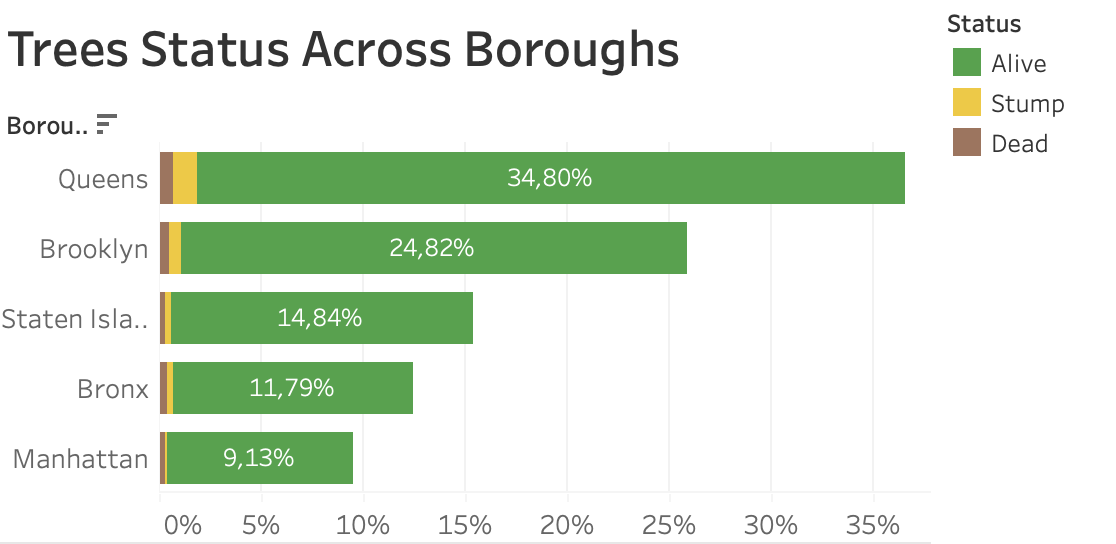

#### Analysis

This table provides the distribution of tree statuses (Alive, Dead, and Stump) across different boroughs in New York City, represented as a percentage of the total number of trees in each borough.
- **The highest proportion of living trees is in Staten Island**, accounting for 96.32% of the total.
- A **small percentage** (1.77% and 1.78%) of trees are classified as **dead in Staten Island and Queens**.
- The **highest proportion** (2.75%) of trees are categorized as **dead in Manhattan**.

### Do certain borough have newer/younger trees?

The age of trees can often be estimated based on the diameter of the trunk.

In [ ]:
-- Calculates the average trunk diameter of trees (only selects the top 10 boroughs with the largest average tree diameter) in each borough 
SELECT borough,
       trunk_diameter
FROM (
    SELECT boroname AS borough,
           ROUND(AVG(tree_dbh), 2) AS trunk_diameter,
           RANK() OVER (PARTITION BY boroname ORDER BY AVG(tree_dbh) DESC) AS rank
    FROM trees
    GROUP BY boroname
) AS ranked_trees
WHERE rank <= 10
ORDER BY 2 DESC;

| borough        | trunk_diameter |
|---------------|----------------|
| Queens        | 18.048          |
| Staten Island | 15.229          |
| Bronx         | 14.746           |
| Brooklyn      | 14.359          |
| Manhattan     | 10.989           |


The table provides information on the average trunk diameter of trees in different boroughs of New York City. 

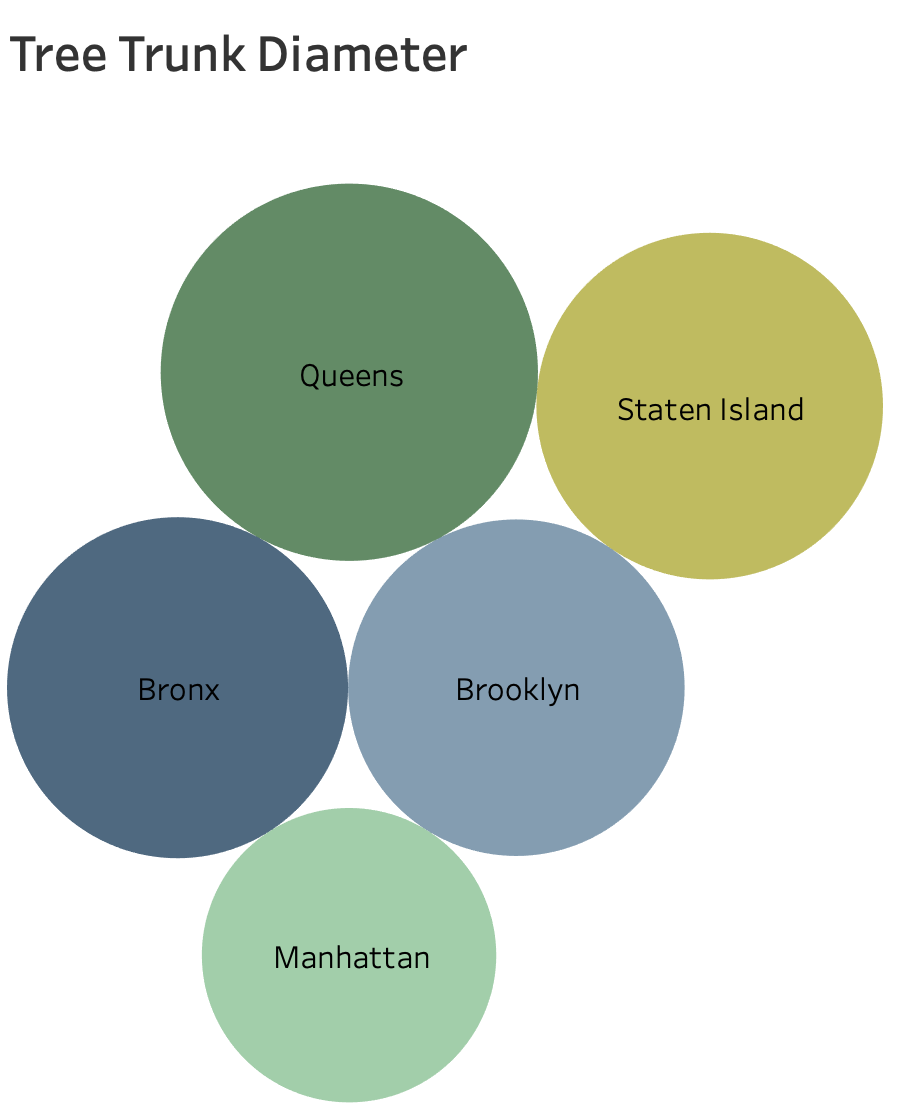

#### Analysis 

- **Queens** has the highest average trunk diameter at 18 inches, indicating potentially **older and larger trees on average** compared to other boroughs.
- **Manhattan has the smallest average trunk** diameter at almost 11 inches, indicating a prevalence of **younger or smaller trees**, possibly due to limited space for tree growth in urban environments.

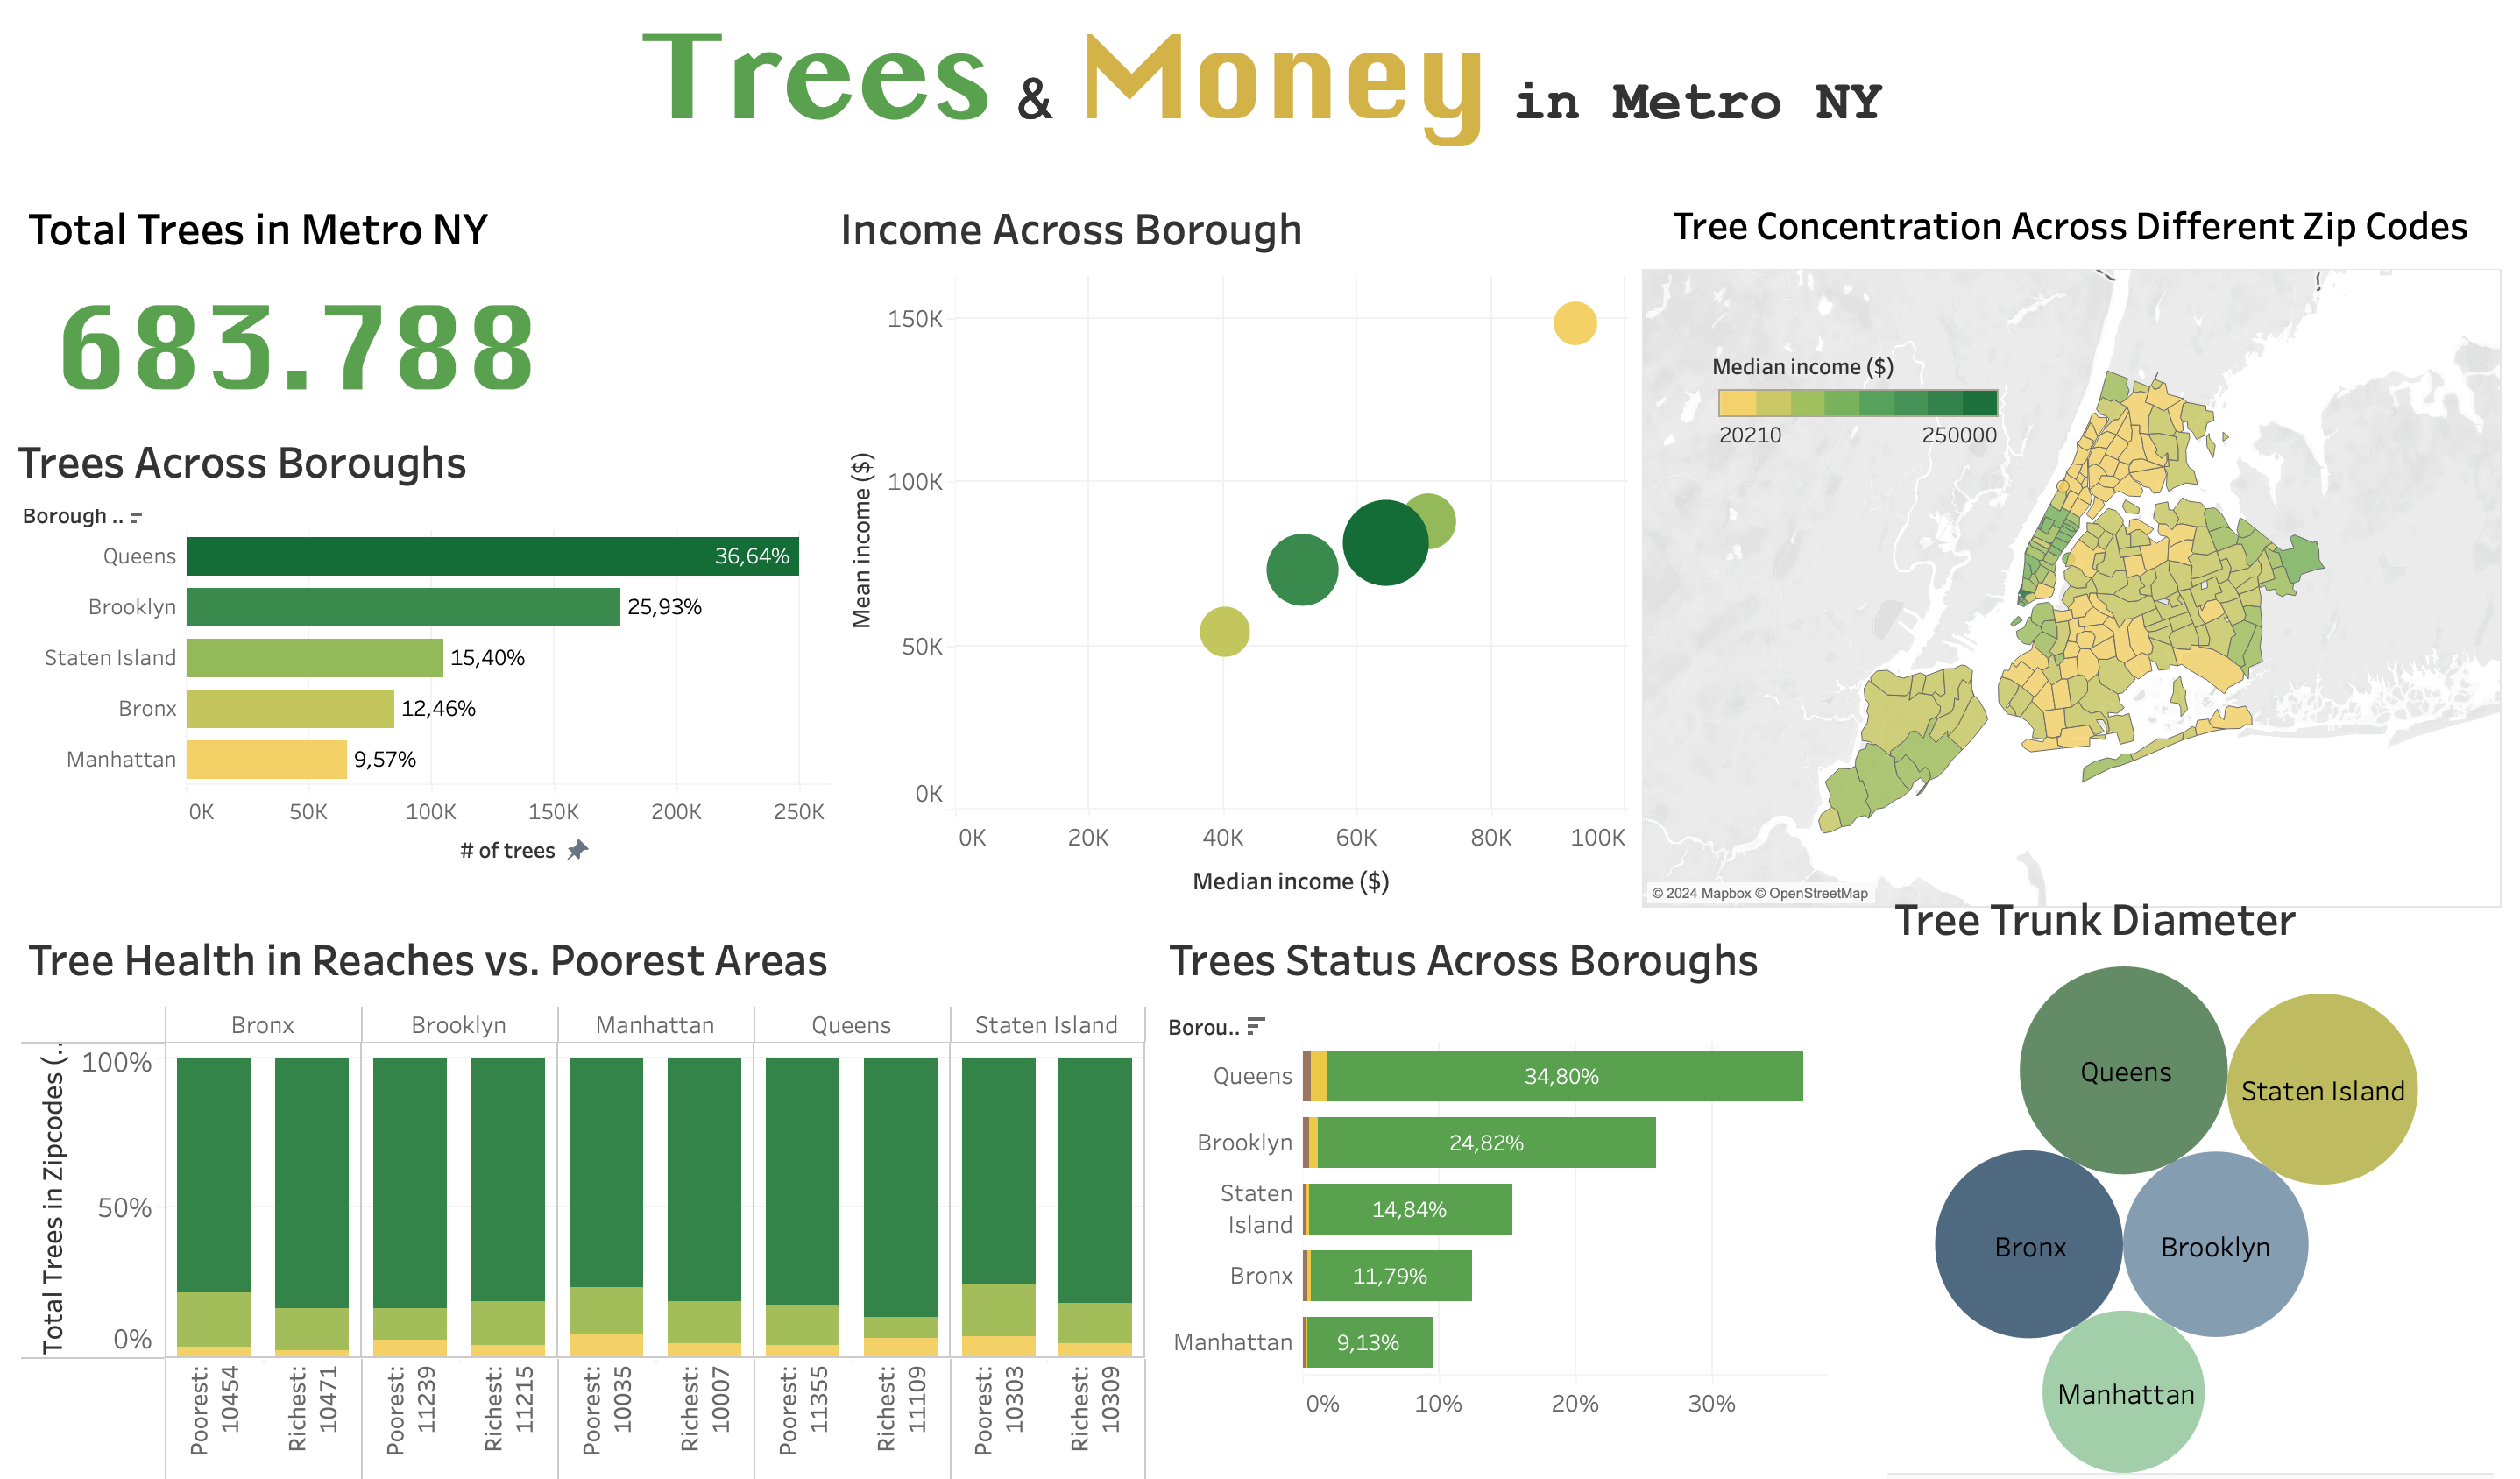

All charts and dashboards can be viewed interactively in [Tableau](https://public.tableau.com/views/TreesMoneyDataAnalysisProject/Dashboard1?:language=en-GB&:sid=&:display_count=n&:origin=viz_share_link).

## Conclusion

### Research Questions:
1. Is there a relationship between trees and income in NYC?

### Key Findings:

1. **Tree Population in Metro NYC**:
   - The analysis revealed a total of 683788 trees across metro NYC.

2. **Tree Distribution by Borough**:
   - Queens has the largest number of trees, followed by Brooklyn, Staten Island, Bronx, and Manhattan, respectively.

3. **Income Disparity by Borough**:
   - The boroughs that have a substantial greenery presence (such as **Queens and Brooklyn**) do not exhibit notably higher or lower income. Meanwhile, **Manhattan** with its highest income levels, has the lowest tree count among the boroughs.

4. **Income Variation Across Zip Codes**:
   - Income varies significantly across different zip codes within each borough (from `20210$` in Bronx till `250000$` in Manhattan), as indicated by the differences in median income estimates.
  
5. **Tree Concentration by Zip Code**:
   - Certain zip codes exhibit a higher concentration of trees compared to others, suggesting variations in greenery distribution across the city.

6. **Relationship Between Tree Health and Income**:
   - The chart indicates that the wealthiest zip codes tend to have a slightly higher proportion of trees rated as 'Good' in health (with the exception of Brooklyn). The most significant disparity is observed in Staten Island borough, where it reaches approximately 6%.

7. **Tree Vitality Across Boroughs**:
   - In Staten Island, the highest proportion of trees (96.32%) are alive, while a small percentage (1.77% and 1.78%) are classified as dead in Staten Island and Queens, respectively. Manhattan has the highest proportion of dead trees at 2.75%.

7. **Tree Age Distribution**:
   - Queens as potentially having older and larger trees on average, while Manhattan has smaller trees, likely due to limited space for growth in urban environments.

